# Clinical Dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import gzip
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
## importing the phenotype dataset

cl = pd.read_csv('miller2005_public_miller2005_public_clinicalMatrix.gz', compression='gzip',delimiter="\t", header=0 )
cl.head()

,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41
4,X104B91,80,Yes,AliveOrCensored,4.0,ER+,G3,NaN,PgR+,24.0,X104B91,X104B91,WT-like,p53+,X104B91


In [3]:
# there are missing values
cl = cl.dropna(axis=0)
cl = cl.drop(['_INTEGRATION', '_PATIENT', '_GENOMIC_ID_miller2005'], axis = 1)

cl


,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,p53DLDAclassResult,p53mutant
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,WT-like,p53-
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,MT-like,p53+
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,MT-like,p53+
5,X105B13,46,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR+,13.0,WT-like,p53-
6,X106B55,37,No,DeathFromCancer,7.0,ER+,G1,LN-,PgR+,60.0,WT-like,p53-
...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,No,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,17.0,WT-like,p53-
246,X90A63,76,Yes,AliveOrCensored,3.0,ER+,G3,LN-,PgR-,26.0,MT-like,p53-
248,X96A21,63,No,DeathFromCancer,0.0,ER+,G2,LN+,PgR+,38.0,WT-like,p53-
249,X99A50,82,Yes,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,19.0,WT-like,p53+


In [4]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 

label = LabelEncoder()

cols = ["DLDAerror", "DSS", "ERstatus", "EistonHistologicGrade",
        "LymphNodeStatus", "PgRstatus", "p53DLDAclassResult", "p53mutant"]

# apply label on categorical feature columns
cl[cols] = cl[cols].apply(lambda col: label.fit_transform(col))    
cl


,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,p53DLDAclassResult,p53mutant
0,X100B08,68,0,0,12.0,0,0,1,1,9.0,1,1
1,X101B88,40,0,0,12.0,1,2,1,1,12.0,0,0
2,X102B06,51,0,0,12.0,0,2,1,0,26.0,0,0
5,X105B13,46,0,0,12.0,0,0,1,0,13.0,1,1
6,X106B55,37,0,1,7.0,0,0,1,0,60.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,X8B87,58,0,0,11.0,0,0,1,0,17.0,1,1
246,X90A63,76,1,0,3.0,0,2,1,1,26.0,0,1
248,X96A21,63,0,1,0.0,0,1,0,0,38.0,1,1
249,X99A50,82,1,0,11.0,0,0,1,0,19.0,1,0


In [5]:
# one-hot encoding the nominal columns

cl_encoded = pd.get_dummies(cl, columns= ["DLDAerror", "DSS", 
                                          "ERstatus", "EistonHistologicGrade",
                                          "LymphNodeStatus", "PgRstatus",
                                          "p53DLDAclassResult", "p53mutant"],
                            drop_first=True)
cl_encoded.shape

(222, 13)

## SPLITTING INTO TRAIN AND TEST SETS


In [6]:
# get features and target for prediction

X = cl_encoded.drop(["sampleID", "DSS.time"], axis=1)
y = cl_encoded["DSS.time"]

# 70% training 30% testing

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# Pipelines

In [7]:
from sklearn.pipeline import Pipeline

## baseline models

xg_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('xg', xgb.XGBRegressor())
    ]
)
knn_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', neighbors.KNeighborsRegressor())
    ]
)
svr_pipe= Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ]
)

In [8]:
# list  and dictionary of pipelines for easy reference

pipelines = [xg_pipe, knn_pipe, svr_pipe]
pipe_dict = {0: 'XGBoost', 1:'KNN', 2:'SVR'}

In [9]:
## fit models

for pipe in pipelines:
    pipe.fit(X_train, y_train)
    
xg_pred = pipelines[0].predict(X_test)
knn_pred = pipelines[1].predict(X_test)
svr_pred = pipelines[2].predict(X_test)

In [10]:
# XGBoost

xg_rmse = sqrt(mean_squared_error(y_test,xg_pred))
xg_r2 = r2_score(y_test, xg_pred)
xg_mae = mean_absolute_error(y_test, xg_pred)
print ('R Squared =',xg_r2)
print ('MAE =',xg_mae)
print ('RMSE =',xg_rmse)

R Squared = 0.48088308230510113
MAE = 1.8926026678797025
RMSE = 2.938574328860173


In [11]:
## KNN

knn_rmse = sqrt(mean_squared_error(y_test,knn_pred))
r2 = r2_score(y_test, knn_pred)
mae = mean_absolute_error(y_test, knn_pred)
print ('R Squared =',r2)
print ('MAE =',mae)
print ('RMSE =',knn_rmse)

R Squared = 0.3068866509535031
MAE = 2.3402985074626868
RMSE = 3.395519435786809


In [12]:
# SVR

svr_rmse = sqrt(mean_squared_error(y_test,svr_pred))
svr_r2 = r2_score(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
print ('R Squared =',svr_r2)
print ('MAE =',svr_mae)
print ('RMSE =',svr_rmse)

R Squared = 0.3201895039814652
MAE = 2.3422553208292394
RMSE = 3.3627766401771466


# PCA

In [13]:
from sklearn.decomposition import PCA

## models with PCA

xg1_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('xg', xgb.XGBRegressor())
    ]
)
knn1_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('knn', neighbors.KNeighborsRegressor())
    ]
)
svr1_pipe= Pipeline(
    [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=2)),
        ('svr', SVR())
    ]
)

In [14]:
# list  and dictionary of pipelines for easy reference

pipelines1 = [xg1_pipe, knn1_pipe, svr1_pipe]
pipe_dict1 = {0: 'XGBoost', 1:'KNN', 2:'SVR'}

In [15]:
## fit models

for pipe1 in pipelines1:
    pipe1.fit(X_train, y_train)
    
xg1_pred = pipelines1[0].predict(X_test)
knn1_pred = pipelines1[1].predict(X_test)
svr1_pred = pipelines1[2].predict(X_test)

In [16]:
# XGBoost with pca

xg1_rmse = sqrt(mean_squared_error(y_test,xg1_pred))
xg1_r2 = r2_score(y_test, xg1_pred)
xg1_mae = mean_absolute_error(y_test, xg1_pred)
print ('R Squared =',xg1_r2)
print ('MAE =',xg1_mae)
print ('RMSE =',xg1_rmse)

R Squared = 0.3597447453083541
MAE = 2.517654917133388
RMSE = 3.2634778156753104


In [17]:
# knn with pca

knn1_rmse = sqrt(mean_squared_error(y_test,knn_pred))
knn1_r2 = r2_score(y_test, knn_pred)
knn1_mae = mean_absolute_error(y_test, knn_pred)
print ('R Squared =',knn1_r2)
print ('MAE =',knn1_mae)
print ('RMSE =',knn1_rmse)

R Squared = 0.3068866509535031
MAE = 2.3402985074626868
RMSE = 3.395519435786809


In [18]:
# svr with pca

svr1_rmse = sqrt(mean_squared_error(y_test,svr1_pred))
svr1_r2 = r2_score(y_test, svr1_pred)
svr1_mae = mean_absolute_error(y_test, svr1_pred)
print ('R Squared =',svr1_r2)
print ('MAE =',svr1_mae)
print ('RMSE =',svr1_rmse)

R Squared = 0.20391840702724617
MAE = 2.5797883347637853
RMSE = 3.6390069095420374


# Results

In [19]:
## all attributes

algo = pd.DataFrame(index=["R Squared", "MAE", "RMSE"],
                   columns=["XGB Regressor", "KNRegressor", "SVR"])

algo.loc["R Squared", "XGB Regressor"] = xg_r2
algo.loc["MAE", "XGB Regressor"] = xg_mae
algo.loc["RMSE", "XGB Regressor"] = xg_rmse

algo.loc["R Squared", "KNRegressor"] = r2
algo.loc["MAE", "KNRegressor"] = mae
algo.loc["RMSE", "KNRegressor"] = knn_rmse

algo.loc["R Squared", "SVR"] = svr_r2
algo.loc["MAE", "SVR"] = svr_mae
algo.loc["RMSE", "SVR"] = svr_rmse

In [20]:
algo

,XGB Regressor,KNRegressor,SVR
R Squared,0.480883,0.306887,0.32019
MAE,1.892603,2.340299,2.342255
RMSE,2.938574,3.395519,3.362777


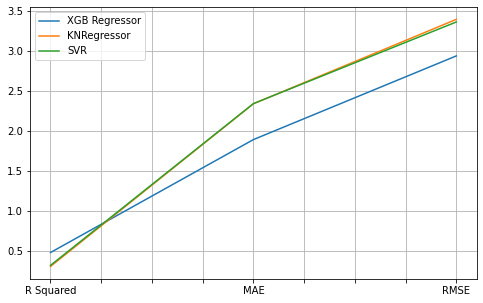

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
algo.plot(kind='line', ax=ax)
ax.grid();

In [22]:
## pca 

algo1 = pd.DataFrame(index=["R Squared", "MAE", "RMSE"],
                   columns=["XGB Regressor", "KNRegressor", "SVR"])

algo1.loc["R Squared", "XGB Regressor"] = xg1_r2
algo1.loc["MAE", "XGB Regressor"] = xg1_mae
algo1.loc["RMSE", "XGB Regressor"] = xg1_rmse

algo1.loc["R Squared", "KNRegressor"] = knn1_r2
algo1.loc["MAE", "KNRegressor"] = knn1_mae
algo1.loc["RMSE", "KNRegressor"] = knn1_rmse

algo1.loc["R Squared", "SVR"] = svr1_r2
algo1.loc["MAE", "SVR"] = svr1_mae
algo1.loc["RMSE", "SVR"] = svr1_rmse


In [23]:
algo1

,XGB Regressor,KNRegressor,SVR
R Squared,0.359745,0.306887,0.203918
MAE,2.517655,2.340299,2.579788
RMSE,3.263478,3.395519,3.639007


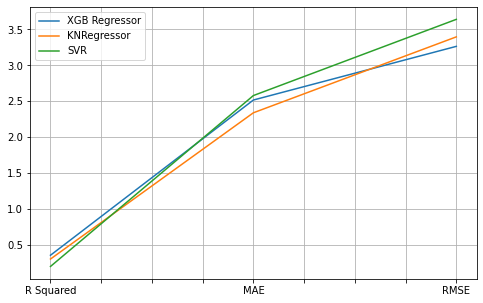

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
algo1.plot(kind='line', ax=ax)
ax.grid();